In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Problem 1
Selection of features for practice <br\>
After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [13]:
data = train.loc[:,['GrLivArea','YearBuilt','SalePrice']]
print(data.shape)
data.head(3)

(1460, 3)


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500


# Problem 2
Estimation and evaluation by linear regression

In [14]:
data.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [15]:
print("Missing values: ",data.isnull().sum().sum())

Missing values:  0


In [16]:
x = data.loc[:,['GrLivArea','YearBuilt']]
y = data['SalePrice']
print(x.shape)
print(y.shape)

(1460, 2)
(1460,)


<b> Only two features will be used and target value. </b>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
scaler = StandardScaler().fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)
reg = LinearRegression().fit(xs_train, y_train)
print("R2 of the prediction:",reg.score(xs_train, y_train))
y_pred = reg.predict(xs_test)
print("MSE:",mean_squared_error(y_test, y_pred))

R2 of the prediction: 0.63958466245
MSE: 2325844746.51


In [36]:
def plot_pred(x,y_true,y_pred,title='title', labelx=['GrLivArea','YearBuilt'], labely='SalePrice',label=["actual","predicted"]):
    for i in range(len(labelx)):
        plt.title(title)
        plt.xlabel(labelx[i])
        plt.ylabel(labely)
        plt.scatter(x.iloc[:,i], y_true, s=80, color='red', label=label[0], marker='o')
        plt.scatter(x.iloc[:,i], y_pred, s=80, color='blue', label=label[1], marker='o')
        plt.legend()
        plt.show()

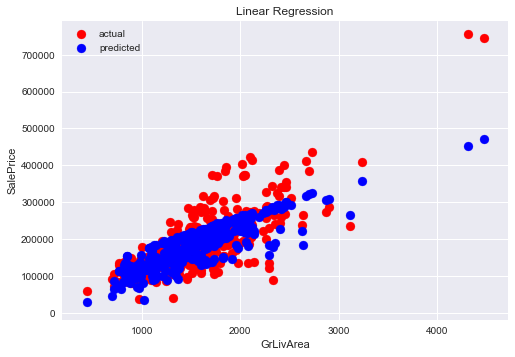

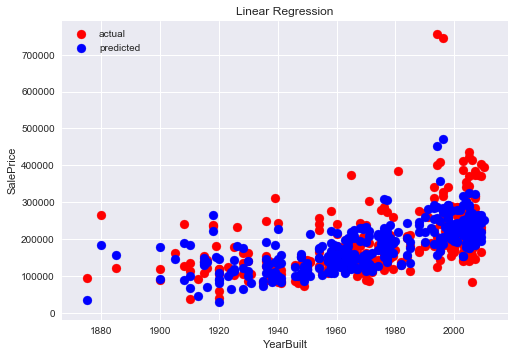

In [37]:
plot_pred(x_test,y_test,y_pred,title='Linear Regression')

# Problem 3
Comparison of methods

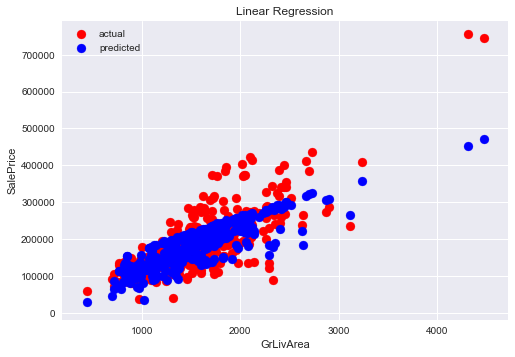

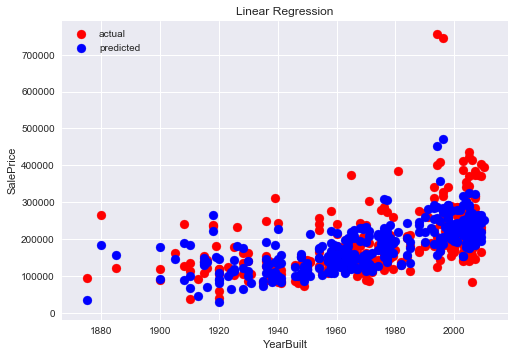

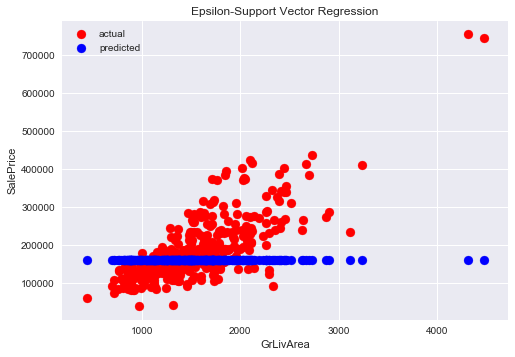

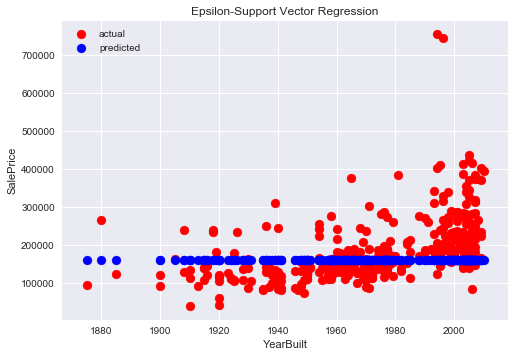

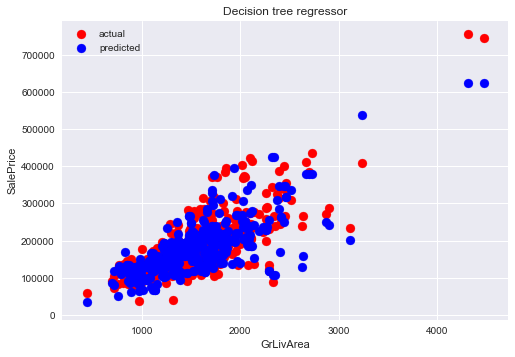

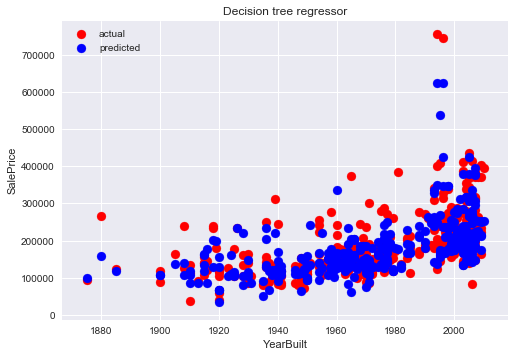

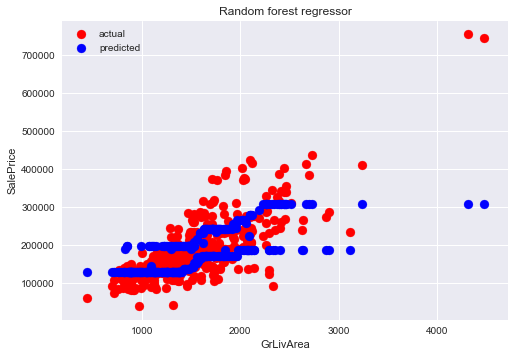

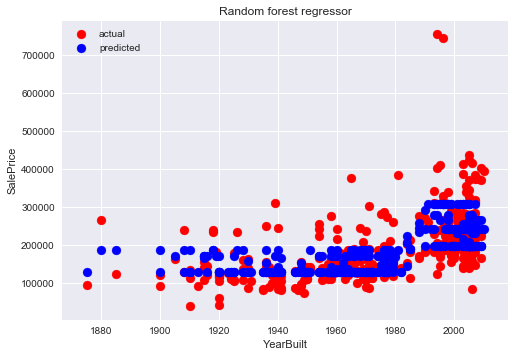

In [41]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
mse_vals=[]
methods=[]
# linear regressor
reg = LinearRegression().fit(xs_train, y_train)
y_reg = reg.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_reg))
methods.append('Linear Regression')
plot_pred(x_test,y_test,y_reg,title='Linear Regression')
# Support verctor regressor
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1)).fit(xs_train, y_train)
y_regr = regr.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_regr))
methods.append('Support Vector Regression')
plot_pred(x_test,y_test,y_regr,title='Epsilon-Support Vector Regression')
# DEcision tree regressor
rdt = DecisionTreeRegressor(random_state=0).fit(xs_train, y_train)
y_rdt = rdt.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_rdt))
methods.append('Decision tree regressor')
plot_pred(x_test,y_test,y_rdt,title='Decision tree regressor')
#Random Forest Regressor
rrf = RandomForestRegressor(max_depth=2, random_state=0).fit(xs_train, y_train)
y_rrf = rrf.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_rrf))
methods.append('Random forest regressor')
plot_pred(x_test,y_test,y_rrf,title='Random forest regressor')

In [42]:
mse_table=pd.DataFrame(mse_vals, index=methods, columns=['mse'])
mse_table

,mse
Linear Regression,2.325845e+09
Support Vector Regression,8.028269e+09
Decision tree regressor,2.771858e+09
Random forest regressor,3.328328e+09


The best performing method is <b>Linear regression </b> with smallest MSE. <br\>
The worst performing method is <b>Support Vector Regression </b> with largest MSE value. 

# Problem 4
(Advance task) Learning using other features

In [49]:
# selection of features
# used 10 features from WEEK3 based on the correlation results

# 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
# 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'
data2 = train.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
                     'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice']]
print(data2.shape)
data2.head(3)

(1460, 11)


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500


In [48]:
print("Missing values:",data2.isnull().sum().sum())

Missing values: 0


In [52]:
x = data2.drop('SalePrice', axis=1)
y = data2.loc[:,'SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
scaler = StandardScaler().fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

In [54]:
mse_vals=[]
methods=[]
# linear regressor
reg = LinearRegression().fit(xs_train, y_train)
y_reg = reg.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_reg))
methods.append('Linear Regression')
# Support verctor regressor
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1)).fit(xs_train, y_train)
y_regr = regr.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_regr))
methods.append('Support Vector Regression')
# DEcision tree regressor
rdt = DecisionTreeRegressor(random_state=0).fit(xs_train, y_train)
y_rdt = rdt.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_rdt))
methods.append('Decision tree regressor')
#Random Forest Regressor
rrf = RandomForestRegressor(max_depth=2, random_state=0).fit(xs_train, y_train)
y_rrf = rrf.predict(xs_test)
mse_vals.append(mean_squared_error(y_true=y_test, y_pred=y_rrf))
methods.append('Random forest regressor')
mse_table=pd.DataFrame(mse_vals, index=methods, columns=['mse'])
mse_table

,mse
Linear Regression,1.614671e+09
Support Vector Regression,8.036950e+09
Decision tree regressor,3.200278e+09
Random forest regressor,2.677997e+09


Still <b> Linear Regression </b> has the best performance. It achieved better performance of <b> mse=1.614671e+09 </b> with 10 features compared to the case of 2 features (<b>mse=2.325845e+09</b>).

In [61]:
# new plot function, plots 10 features 
def plot_pred1(x,y_true,y_pred,title='title', labely='SalePrice',label=["actual","predicted"]):
    labels = x.columns
    for i in range(len(labels)):
        plt.title(title)
        plt.xlabel(labels[i])
        plt.ylabel(labely)
        plt.scatter(x.iloc[:,i], y_true, s=80, color='red', label=label[0], marker='o')
        plt.scatter(x.iloc[:,i], y_pred, s=80, color='blue', label=label[1], marker='o')
        plt.legend()
        plt.show()

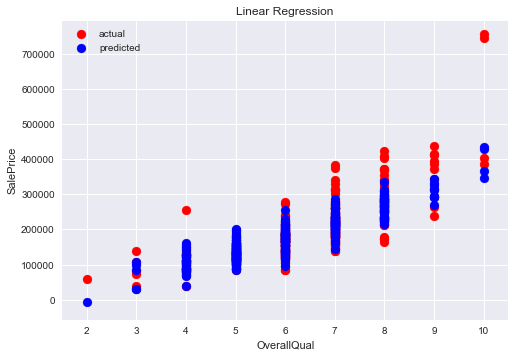

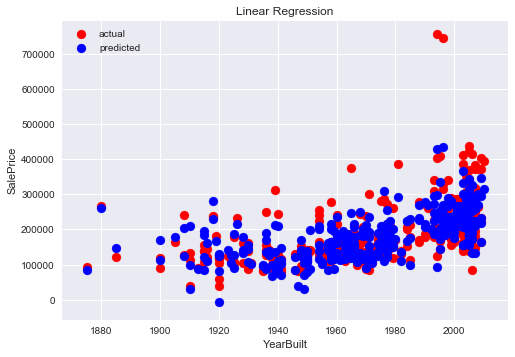

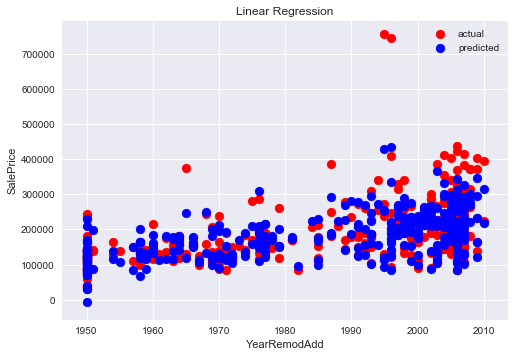

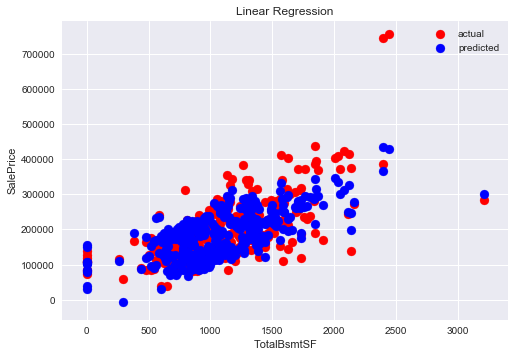

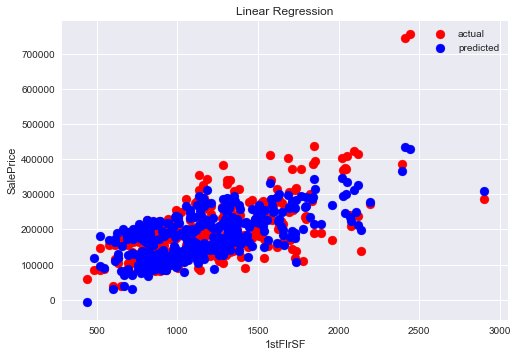

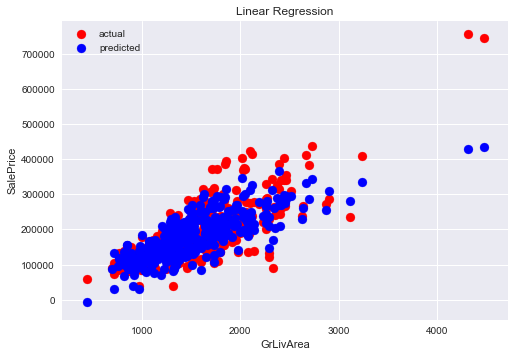

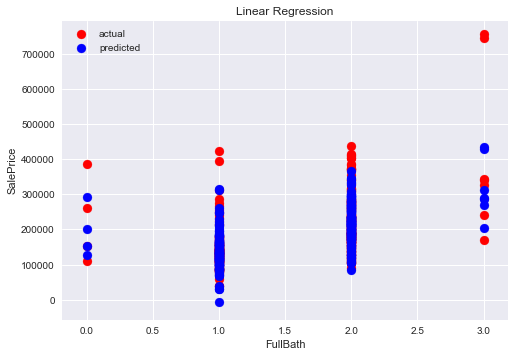

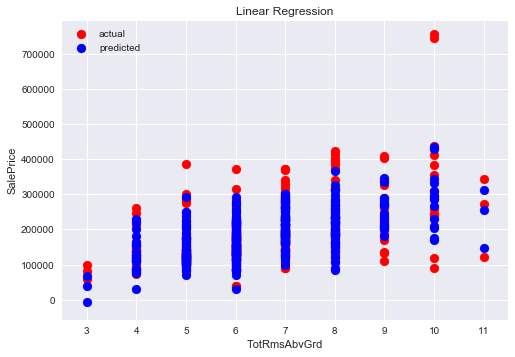

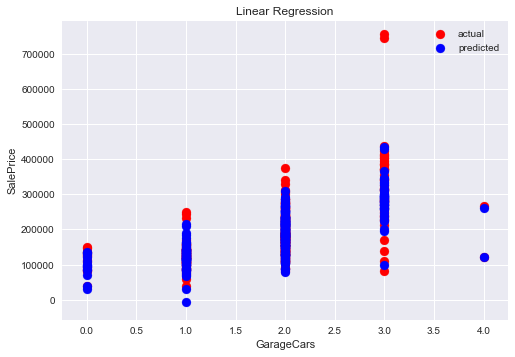

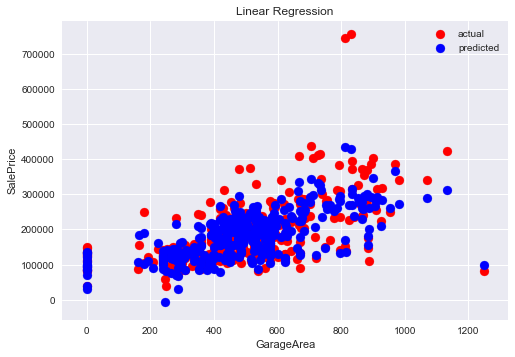

In [62]:
plot_pred1(x_test,y_test,y_reg,title='Linear Regression')